In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.datasets import load_boston
#lib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=load_boston()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['medv']=data.target

In [5]:
X=df.drop(labels='medv',axis=1)
y=df['medv']

In [6]:
# split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [7]:
X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


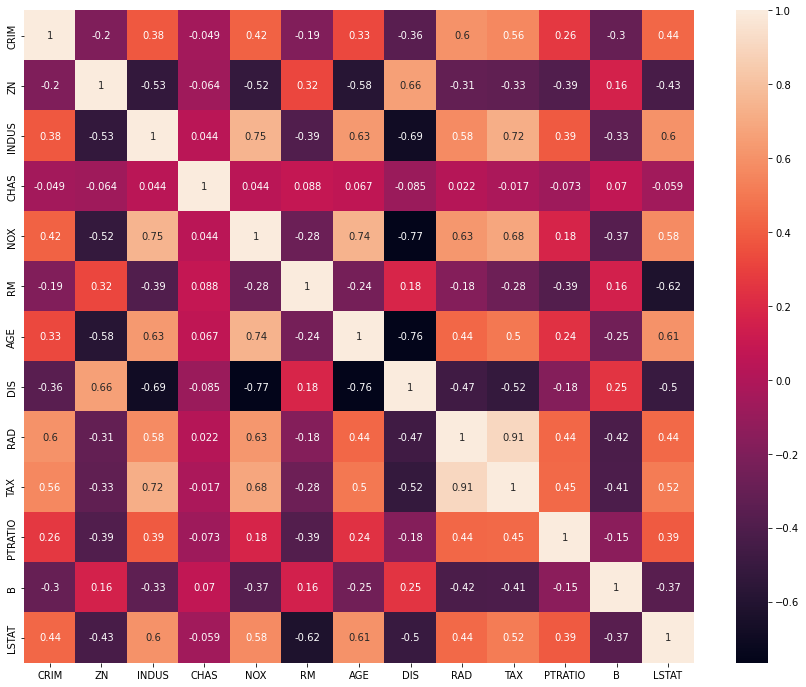

In [8]:
plt.figure(figsize=(15,12))
sns.heatmap(X_train.corr(),annot=True)

In [9]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i,j])>threshold):
        col_name=corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [10]:
corr_feature=correlation(X_train,0.7)

In [11]:
corr_feature

{'AGE', 'DIS', 'NOX', 'TAX'}

In [12]:
#read data set
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
# split data into traning and testing
# train_test_split
X=df[['sepal_length','sepal_width','petal_length','petal_width']]
y=df['species']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

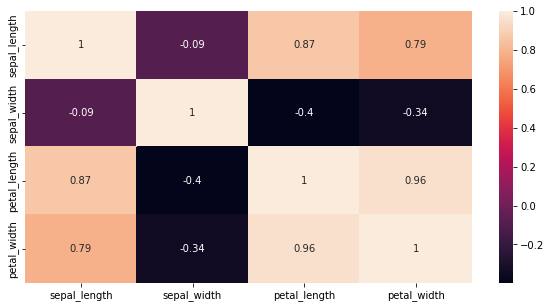

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(X_train.corr(),annot=True)

In [17]:
corr_feature=correlation(X_train,0.9)

In [18]:
corr_feature

{'petal_width'}

In [20]:
#split data into x and y
# x=SL,PL,PW
# y=species
X=df[['sepal_length','sepal_width','petal_length']]
y=df['species']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3)

In [22]:
# create a model k=3,distance=manhatten_distance
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
ML_model=KNeighborsClassifier(n_neighbors=3,p=1)
print("model created")

#model traning
ML_model.fit(X_train,y_train)
print("model traning completed")

#find t y_pred
y_pred=ML_model.predict(X_test)
print("y_pred completed")

# find accuracy
acc=accuracy_score(y_test,y_pred)
print("ACC for =3:-",acc*100)

model created
model traning completed
y_pred completed
ACC for =3:- 91.11111111111111
